<a href="https://colab.research.google.com/github/tangannbelang/machineLearningTimedoor/blob/main/Iris_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the ucimlrepo package

In [1]:
pip install ucimlrepo

Import the dataset into your code

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [4]:
# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [5]:
iris

{'data': {'ids': None,
  'features':      sepal length  sepal width  petal length  petal width
  0             5.1          3.5           1.4          0.2
  1             4.9          3.0           1.4          0.2
  2             4.7          3.2           1.3          0.2
  3             4.6          3.1           1.5          0.2
  4             5.0          3.6           1.4          0.2
  ..            ...          ...           ...          ...
  145           6.7          3.0           5.2          2.3
  146           6.3          2.5           5.0          1.9
  147           6.5          3.0           5.2          2.0
  148           6.2          3.4           5.4          2.3
  149           5.9          3.0           5.1          1.8
  
  [150 rows x 4 columns],
  'targets':               class
  0       Iris-setosa
  1       Iris-setosa
  2       Iris-setosa
  3       Iris-setosa
  4       Iris-setosa
  ..              ...
  145  Iris-virginica
  146  Iris-virginica
  147  

Import library

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
iris_data = pd.concat([X, y], axis=1)
iris_data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='class', ylabel='count'>

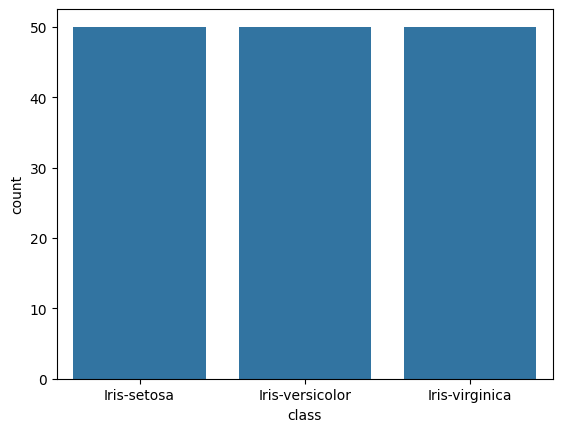

In [9]:
sns.countplot(x='class', data=iris_data ) #Menghitung jumlah data per class , class sebagai sumbu x

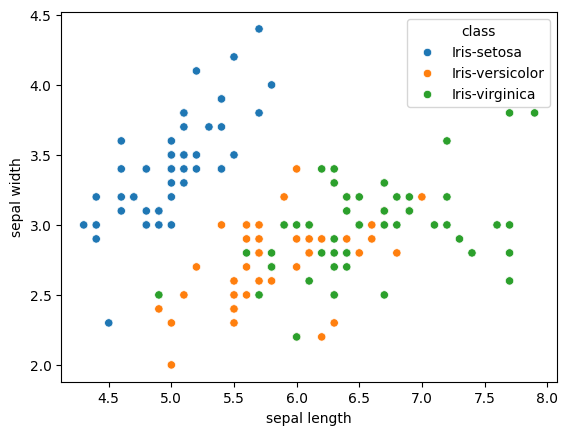

In [12]:
fig1 = sns.scatterplot(x='sepal length', y='sepal width',hue='class', data=iris_data)

[Text(0.5, 1.0, 'Petal Length and Petal Width')]

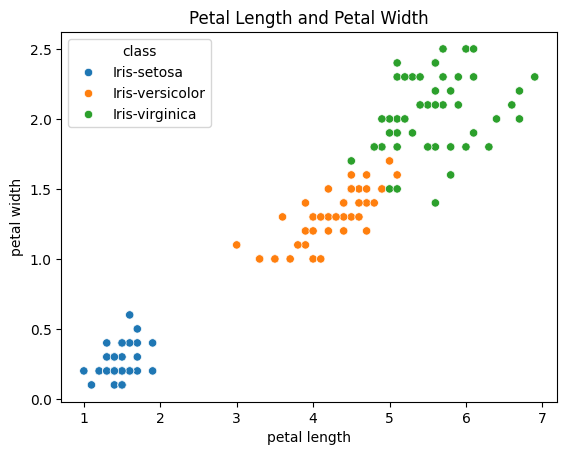

In [13]:
fig2 = sns.scatterplot(x='petal length', y='petal width',hue='class', data=iris_data)
fig2.set(title='Petal Length and Petal Width')

Split data

In [14]:
features = iris_data.iloc[:, 0:4] #memilih semua data pada kolom sepal length, sepal width, petal length, petal width untuk disimpan pada features.
label = iris_data.iloc[:, 4] #Memilih data pada kolom label untuk disimpan pada label.
print("Features : " )
print(features)
print("Label  : ")
print(label)

Features : 
     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Label  : 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Len

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=0)
print('Jumlah data train' ,X_train.shape[0])
print('Jumlah data test', y_test.shape[0])

Jumlah data train 120
Jumlah data test 30


Choosing a model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights="uniform") # Dijelaskan di bagian (A)

knn.fit(X_train, y_train) # Dijelaskan di bagian (B)

train_acc = knn.score(X_train, y_train) # Dijelaskan di bagian (C)

print("The accuracy Of KNN classifier on training data is :  {:.3f}".format(train_acc))

The accuracy Of KNN classifier on training data is :  0.950


In [23]:
knn_test_acc = knn.score(X_test, y_test)
print("The accuracy Of KNN classifier on test data is :  {:.3f}".format(knn_test_acc))

The accuracy Of KNN classifier on test data is :  0.967


Confusion Matrix


Text(0.5, 1.0, 'Confusion Matrix')

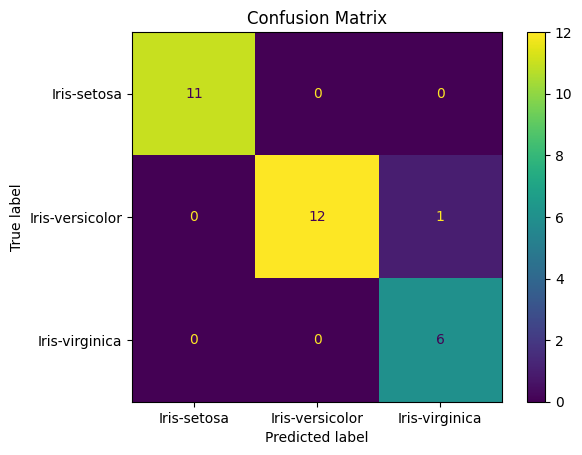

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test
,y_test)
disp.ax_.set_title("Confusion Matrix")

Parameter tuning

In [25]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
data = pd.concat([X, y], axis=1)
features = data.iloc[:, 0:4]
label= data.iloc[:, 4]

In [27]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
from sklearn.neighbors import KNeighborsClassifier
n_range = list(range(1,10))# a
weight_list = ["uniform","distance"] #b
param_grid = {"n_neighbors": n_range, "weights":weight_list}   # c
grid = GridSearchCV(estimator = KNeighborsClassifier(),
                    param_grid = param_grid,
                    cv = 3,  #                   d
                    scoring = 'accuracy',
                    refit = True)
knn_model = make_pipeline(preprocessing.StandardScaler(), grid) #e
knn_model.fit(features, label)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_) #f

Accuracy of the tuned model: 0.9733
{'n_neighbors': 7, 'weights': 'distance'}


pickle untuk menyimpan model kedalam ipynb

In [29]:
import pickle
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn_model, f)

In [45]:
# Load the model
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)
# Predict new data
new_data =[0.9,0.9,0.9,4.2] #Nilai sepal length, width,  petal length dan width berturut-turut yang akan diprediksi labelnya.
X= np.array([new_data])
prediction = model.predict(X) #Melalukan prediksi data
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-versicolor']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
